In [1]:
!pip install pandas

In [2]:
!pip install nltk

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk

In [4]:
data=pd.read_csv("Restaurant_Reviews.csv",sep='\t')
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
 data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

<AxesSubplot:xlabel='Liked', ylabel='count'>

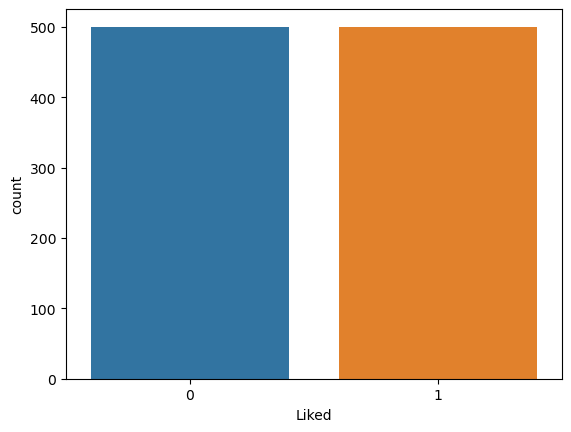

In [7]:
sns.countplot(x= data['Liked'])

In [8]:
data['Review Letter Count']=data['Review'].apply(len)

In [9]:
data.head(10)

,Review,Liked,Review Letter Count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
8,The fries were great too.,1,25
9,A great touch.,1,14


# preprocessing

In [72]:
df=data.copy()

In [73]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
def Remove_punct(data):
    data_nopunct="".join([char for char in data if char not in string.punctuation])
    return data_nopunct
df[ 'Review_nopunc' ] = df[ 'Review' ].apply(lambda x: Remove_punct(x.lower()))
df.head(20)

,Review,Liked,Review Letter Count,Review_nopunc
0,Wow... Loved this place.,1,24,wow loved this place
1,Crust is not good.,0,18,crust is not good
2,Not tasty and the texture was just nasty.,0,41,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,87,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,59,the selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho.,0,46,now i am getting angry and i want my damn pho
6,Honeslty it didn't taste THAT fresh.),0,37,honeslty it didnt taste that fresh
7,The potatoes were like rubber and you could te...,0,111,the potatoes were like rubber and you could te...
8,The fries were great too.,1,25,the fries were great too
9,A great touch.,1,14,a great touch


In [75]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Smart\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
import nltk

dir(nltk)[0:10]

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures']

In [77]:
from nltk.tokenize import word_tokenize
def tokenize(data):
    data_tokens=word_tokenize(data)
    return data_tokens
df[ 'Review_tokenized' ] = df[ 'Review_nopunc' ].apply(lambda x: tokenize(x))
df.head(10)

,Review,Liked,Review Letter Count,Review_nopunc,Review_tokenized
0,Wow... Loved this place.,1,24,wow loved this place,"[wow, loved, this, place]"
1,Crust is not good.,0,18,crust is not good,"[crust, is, not, good]"
2,Not tasty and the texture was just nasty.,0,41,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]"
3,Stopped by during the late May bank holiday of...,1,87,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho..."
4,The selection on the menu was great and so wer...,1,59,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an..."
5,Now I am getting angry and I want my damn pho.,0,46,now i am getting angry and i want my damn pho,"[now, i, am, getting, angry, and, i, want, my,..."
6,Honeslty it didn't taste THAT fresh.),0,37,honeslty it didnt taste that fresh,"[honeslty, it, didnt, taste, that, fresh]"
7,The potatoes were like rubber and you could te...,0,111,the potatoes were like rubber and you could te...,"[the, potatoes, were, like, rubber, and, you, ..."
8,The fries were great too.,1,25,the fries were great too,"[the, fries, were, great, too]"
9,A great touch.,1,14,a great touch,"[a, great, touch]"


In [78]:
import nltk
from nltk.corpus import stopwords

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Smart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
stopwords_en=nltk.corpus.stopwords.words('english')

In [81]:
print(stopwords_en) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [82]:
list1=['no','nor','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't", "haven't","isn't","wasn't","weren't", "won't","wouldn't"]
e=[]
for i in stopwords_en:
    if((i not in list1)):
            e.append(i)
    
print(e)    

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [83]:
def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in e]
    return text
df[ 'Review_nostop' ] = df[ 'Review_tokenized' ].apply(lambda x: remove_stopwords(x))
df.head(10)


,Review,Liked,Review Letter Count,Review_nopunc,Review_tokenized,Review_nostop
0,Wow... Loved this place.,1,24,wow loved this place,"[wow, loved, this, place]","[wow, loved, place]"
1,Crust is not good.,0,18,crust is not good,"[crust, is, not, good]","[crust, not, good]"
2,Not tasty and the texture was just nasty.,0,41,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,87,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...","[stopped, late, may, bank, holiday, rick, stev..."
4,The selection on the menu was great and so wer...,1,59,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...","[selection, menu, great, prices]"
5,Now I am getting angry and I want my damn pho.,0,46,now i am getting angry and i want my damn pho,"[now, i, am, getting, angry, and, i, want, my,...","[getting, angry, want, damn, pho]"
6,Honeslty it didn't taste THAT fresh.),0,37,honeslty it didnt taste that fresh,"[honeslty, it, didnt, taste, that, fresh]","[honeslty, didnt, taste, fresh]"
7,The potatoes were like rubber and you could te...,0,111,the potatoes were like rubber and you could te...,"[the, potatoes, were, like, rubber, and, you, ...","[potatoes, like, rubber, could, tell, made, ah..."
8,The fries were great too.,1,25,the fries were great too,"[the, fries, were, great, too]","[fries, great]"
9,A great touch.,1,14,a great touch,"[a, great, touch]","[great, touch]"


In [84]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Smart\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [85]:
import nltk 
wn = nltk.WordNetLemmatizer()
ps=  nltk.PorterStemmer()


In [86]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [87]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [88]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Smart\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [89]:
from nltk.stem import WordNetLemmatizer
def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word)for word in tokenized_text]
    return text

df[ 'Review_lemmatized' ] = df[ 'Review_nostop' ].apply(lambda x: lemmatizing(x))
df.head(10)


,Review,Liked,Review Letter Count,Review_nopunc,Review_tokenized,Review_nostop,Review_lemmatized
0,Wow... Loved this place.,1,24,wow loved this place,"[wow, loved, this, place]","[wow, loved, place]","[wow, loved, place]"
1,Crust is not good.,0,18,crust is not good,"[crust, is, not, good]","[crust, not, good]","[crust, not, good]"
2,Not tasty and the texture was just nasty.,0,41,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, texture, nasty]","[not, tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,87,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...","[stopped, late, may, bank, holiday, rick, stev...","[stopped, late, may, bank, holiday, rick, stev..."
4,The selection on the menu was great and so wer...,1,59,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...","[selection, menu, great, prices]","[selection, menu, great, price]"
5,Now I am getting angry and I want my damn pho.,0,46,now i am getting angry and i want my damn pho,"[now, i, am, getting, angry, and, i, want, my,...","[getting, angry, want, damn, pho]","[getting, angry, want, damn, pho]"
6,Honeslty it didn't taste THAT fresh.),0,37,honeslty it didnt taste that fresh,"[honeslty, it, didnt, taste, that, fresh]","[honeslty, didnt, taste, fresh]","[honeslty, didnt, taste, fresh]"
7,The potatoes were like rubber and you could te...,0,111,the potatoes were like rubber and you could te...,"[the, potatoes, were, like, rubber, and, you, ...","[potatoes, like, rubber, could, tell, made, ah...","[potato, like, rubber, could, tell, made, ahea..."
8,The fries were great too.,1,25,the fries were great too,"[the, fries, were, great, too]","[fries, great]","[fry, great]"
9,A great touch.,1,14,a great touch,"[a, great, touch]","[great, touch]","[great, touch]"


In [90]:
def stemming(tokenized_text):
    text=[ps.stem(word)for word in tokenized_text]
    return text

df[ 'Review_stemmed' ] = df[ 'Review_nostop' ].apply(lambda x: stemming(x))
df.head(10)

,Review,Liked,Review Letter Count,Review_nopunc,Review_tokenized,Review_nostop,Review_lemmatized,Review_stemmed
0,Wow... Loved this place.,1,24,wow loved this place,"[wow, loved, this, place]","[wow, loved, place]","[wow, loved, place]","[wow, love, place]"
1,Crust is not good.,0,18,crust is not good,"[crust, is, not, good]","[crust, not, good]","[crust, not, good]","[crust, not, good]"
2,Not tasty and the texture was just nasty.,0,41,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, texture, nasty]","[not, tasty, texture, nasty]","[not, tasti, textur, nasti]"
3,Stopped by during the late May bank holiday of...,1,87,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...","[stopped, late, may, bank, holiday, rick, stev...","[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ..."
4,The selection on the menu was great and so wer...,1,59,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...","[selection, menu, great, prices]","[selection, menu, great, price]","[select, menu, great, price]"
5,Now I am getting angry and I want my damn pho.,0,46,now i am getting angry and i want my damn pho,"[now, i, am, getting, angry, and, i, want, my,...","[getting, angry, want, damn, pho]","[getting, angry, want, damn, pho]","[get, angri, want, damn, pho]"
6,Honeslty it didn't taste THAT fresh.),0,37,honeslty it didnt taste that fresh,"[honeslty, it, didnt, taste, that, fresh]","[honeslty, didnt, taste, fresh]","[honeslty, didnt, taste, fresh]","[honeslti, didnt, tast, fresh]"
7,The potatoes were like rubber and you could te...,0,111,the potatoes were like rubber and you could te...,"[the, potatoes, were, like, rubber, and, you, ...","[potatoes, like, rubber, could, tell, made, ah...","[potato, like, rubber, could, tell, made, ahea...","[potato, like, rubber, could, tell, made, ahea..."
8,The fries were great too.,1,25,the fries were great too,"[the, fries, were, great, too]","[fries, great]","[fry, great]","[fri, great]"
9,A great touch.,1,14,a great touch,"[a, great, touch]","[great, touch]","[great, touch]","[great, touch]"


In [65]:
#df=df.drop(columns="Review_steemd")

In [98]:
def clean_text(text):
    text="".join([word.lower()for word in text if word not in string.punctuation])
    data_tokens=word_tokenize(text)
    text=" ".join([wn.lemmatize(word)for word in data_tokens if word not in e])
    return text
df=df[['Review','Liked']]
df['clean_text']=df['Review'].apply(lambda x:clean_text(x))

In [99]:
df.head()

,Review,Liked,clean_text
0,Wow... Loved this place.,1,wow loved place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great price


In [100]:
df.shape

(1000, 3)

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidf=TfidfVectorizer( ngram_range=(1,1))
features_tfidf=tfidf.fit_transform(df['clean_text'])
print(features_tfidf.shape)
print('Sparse Matrix :\n',features_tfidf)
features_tfidf=pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns=tfidf.get_feature_names()
features_tfidf

(1000, 1830)
Sparse Matrix :
   (0, 1195)	0.35348047378248904
  (0, 940)	0.603721257780306
  (0, 1808)	0.714543348970986
  (1, 686)	0.4113212450165673
  (1, 1079)	0.3831707047404009
  (1, 377)	0.8270399291610807
  (2, 1053)	0.584655101336037
  (2, 1606)	0.584655101336037
  (2, 1594)	0.4861785698160517
  (2, 1079)	0.28282012519464567
  (3, 1304)	0.32159400647598674
  (3, 1528)	0.35577006345165846
  (3, 1345)	0.35577006345165846
  (3, 773)	0.35577006345165846
  (3, 125)	0.35577006345165846
  (3, 979)	0.30160229472270916
  (3, 890)	0.33577835169838083
  (3, 1536)	0.33577835169838083
  (3, 940)	0.27171638832534173
  (4, 1235)	0.516758255582346
  (4, 699)	0.3845392493228569
  (4, 1001)	0.5226440323558043
  (4, 1412)	0.5585102384563504
  (5, 1183)	0.43608042430772426
  (5, 388)	0.46068763190943435
  :	:
  (997, 679)	0.32904601401622957
  (997, 1804)	0.3623046096781041
  (997, 1079)	0.5034200187013237
  (998, 1070)	0.41010445682566415
  (998, 1779)	0.3870595440242609
  (998, 1576)	0.299507197

C:\Users\Smart\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,1199,12,15,15lb,17,1979,20,2007,...,yelpers,yet,youd,youll,youre,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
x=tfidf.fit_transform(df['clean_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
y=data['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=44)

In [106]:
x_train.shape

(670, 1830)

In [107]:
x_test.shape

(330, 1830)

In [108]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


# Model By Using Lemmatization

In [109]:
spam_detect_model = MultinomialNB().fit(x_train, y_train)
pred_test_MNB = spam_detect_model.predict(x_test)
precision = precision_score(y_test, pred_test_MNB)
recall = recall_score(y_test, pred_test_MNB)
accuracy = accuracy_score(y_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(y_test,pred_test_MNB))
print (classification_report(y_test, pred_test_MNB))

Precision: 0.763 / Recall: 0.849 / Accuracy: 0.8
[[129  42]
 [ 24 135]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.80       171
           1       0.76      0.85      0.80       159

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



In [110]:
spam_detect_model = tree.DecisionTreeClassifier().fit(x_train, y_train)
pred_test_MNB = spam_detect_model.predict(x_test)
precision = precision_score(y_test, pred_test_MNB)
recall = recall_score(y_test, pred_test_MNB)
accuracy = accuracy_score(y_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(y_test,pred_test_MNB))
print (classification_report(y_test, pred_test_MNB))

Precision: 0.729 / Recall: 0.591 / Accuracy: 0.697
[[136  35]
 [ 65  94]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73       171
           1       0.73      0.59      0.65       159

    accuracy                           0.70       330
   macro avg       0.70      0.69      0.69       330
weighted avg       0.70      0.70      0.69       330



In [111]:
spam_detect_model = RandomForestClassifier().fit(x_train, y_train)
pred_test_MNB = spam_detect_model.predict(x_test)
precision = precision_score(y_test, pred_test_MNB)
recall = recall_score(y_test, pred_test_MNB)
accuracy = accuracy_score(y_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(y_test,pred_test_MNB))
print (classification_report(y_test, pred_test_MNB))

Precision: 0.817 / Recall: 0.591 / Accuracy: 0.739
[[150  21]
 [ 65  94]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       171
           1       0.82      0.59      0.69       159

    accuracy                           0.74       330
   macro avg       0.76      0.73      0.73       330
weighted avg       0.76      0.74      0.73       330



In [112]:
def clean2_text(text):
    text="".join([word.lower()for word in text if word not in string.punctuation])
    data_tokens=word_tokenize(text)
    text=" ".join([ps.stem(word)for word in data_tokens if word not in e])
    return text
df=df[['Review','Liked']]
df['clean2_text']=df['Review'].apply(lambda x:clean2_text(x))

In [113]:
df.head()

,Review,Liked,clean2_text
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price


In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidf=TfidfVectorizer( ngram_range=(1,1))
features_tfidf=tfidf.fit_transform(df['clean2_text'])
print(features_tfidf.shape)
print('Sparse Matrix :\n',features_tfidf)
features_tfidf=pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns=tfidf.get_feature_names()
features_tfidf

(1000, 1631)
Sparse Matrix :
   (0, 1075)	0.37891311005388717
  (0, 839)	0.5161133452017592
  (0, 1610)	0.7681483384958535
  (1, 620)	0.4113212450165673
  (1, 968)	0.3831707047404009
  (1, 348)	0.8270399291610807
  (2, 943)	0.584655101336037
  (2, 1425)	0.584655101336037
  (2, 1413)	0.4861785698160517
  (2, 968)	0.28282012519464567
  (3, 1163)	0.2561558111760375
  (3, 1355)	0.3723211600542704
  (3, 1196)	0.3723211600542704
  (3, 699)	0.3723211600542704
  (3, 115)	0.3723211600542704
  (3, 872)	0.315633404218248
  (3, 801)	0.3513993960383886
  (3, 1362)	0.32504109062571496
  (3, 839)	0.22612899750898208
  (4, 1110)	0.501368964508553
  (4, 633)	0.38862759845674283
  (4, 893)	0.5282006856253344
  (4, 1253)	0.5644482144982766
  (5, 1063)	0.45159844554308565
  (5, 358)	0.4770813062326693
  :	:
  (997, 614)	0.3055059518686215
  (997, 1606)	0.36689106640348845
  (997, 968)	0.5097928720098068
  (998, 959)	0.4123000957431741
  (998, 1581)	0.3891318038695486
  (998, 1399)	0.30111071497619335
  (9

C:\Users\Smart\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,1199,12,15,15lb,17,1979,20,2007,...,yelper,yet,youd,youll,your,yucki,yukon,yum,yummi,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
x=tfidf.fit_transform(df['clean2_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [116]:
y=data['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=44)

In [119]:
x_train.shape

(670, 1631)

In [120]:
x_test.shape

(330, 1631)

# Model By Using Stemming

In [122]:
spam_detect_model = MultinomialNB().fit(x_train, y_train)
pred_test_MNB = spam_detect_model.predict(x_test)
precision = precision_score(y_test, pred_test_MNB)
recall = recall_score(y_test, pred_test_MNB)
accuracy = accuracy_score(y_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(y_test,pred_test_MNB))
print (classification_report(y_test, pred_test_MNB))

Precision: 0.767 / Recall: 0.83 / Accuracy: 0.797
[[131  40]
 [ 27 132]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       171
           1       0.77      0.83      0.80       159

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



In [123]:
spam_detect_model = tree.DecisionTreeClassifier().fit(x_train, y_train)
pred_test_MNB = spam_detect_model.predict(x_test)
precision = precision_score(y_test, pred_test_MNB)
recall = recall_score(y_test, pred_test_MNB)
accuracy = accuracy_score(y_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(y_test,pred_test_MNB))
print (classification_report(y_test, pred_test_MNB))

Precision: 0.761 / Recall: 0.679 / Accuracy: 0.742
[[137  34]
 [ 51 108]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       171
           1       0.76      0.68      0.72       159

    accuracy                           0.74       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.74      0.74      0.74       330



In [124]:
spam_detect_model = RandomForestClassifier().fit(x_train, y_train)
pred_test_MNB = spam_detect_model.predict(x_test)
precision = precision_score(y_test, pred_test_MNB)
recall = recall_score(y_test, pred_test_MNB)
accuracy = accuracy_score(y_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(y_test,pred_test_MNB))
print (classification_report(y_test, pred_test_MNB))

Precision: 0.821 / Recall: 0.692 / Accuracy: 0.779
[[147  24]
 [ 49 110]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       171
           1       0.82      0.69      0.75       159

    accuracy                           0.78       330
   macro avg       0.79      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330

